<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/Activity_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [11]:

# 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

TRAIN = "train/"
TEST = "test/"

DATASET_PATH = "/content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np
import os

def load_dataset():
    """Loads the UCI HAR dataset from the specified paths."""
    # Define paths to the data files
    train_x_path = os.path.join(DATASET_PATH, TRAIN, 'X_train.txt')
    train_y_path = os.path.join(DATASET_PATH, TRAIN, 'y_train.txt')
    test_x_path = os.path.join(DATASET_PATH, TEST, 'X_test.txt')
    test_y_path = os.path.join(DATASET_PATH, TEST, 'y_test.txt')

    print(f"Loading training data from: {train_x_path}")
    print(f"Loading training labels from: {train_y_path}")
    print(f"Loading testing data from: {test_x_path}")
    print(f"Loading testing labels from: {test_y_path}")

    # Load data using numpy for efficiency with large numerical datasets
    # These files usually contain space-separated floats or integers
    trainX = np.loadtxt(train_x_path)
    trainy = np.loadtxt(train_y_path)
    testX = np.loadtxt(test_x_path)
    testy = np.loadtxt(test_y_path)

    return trainX, trainy, testX, testy

In [13]:
df = load_dataset()

Loading training data from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt
Loading training labels from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt
Loading testing data from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt
Loading testing labels from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt


In [14]:
# Convert NumPy arrays in the tuple to pandas DataFrames for better visualization
trainX_df = pd.DataFrame(df[0].reshape(-1, df[0].shape[-1]))
trainy_df = pd.DataFrame(df[1])
testX_df = pd.DataFrame(df[2].reshape(-1, df[2].shape[-1]))
testy_df = pd.DataFrame(df[3])

# Define a mapping from numerical labels to activity names
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

print("Training Data (X):")
display(trainX_df.head())

print("\nTraining Labels (y):")
# Map numerical labels to activity names for display
display(trainy_df.head().replace(activity_labels))

print("\nTesting Data (X):")
display(testX_df.head())

print("\nTesting Labels (y):")
# Map numerical labels to activity names for display
display(testy_df.head().replace(activity_labels))

Training Data (X):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892



Training Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING



Testing Data (X):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857



Testing Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [16]:
print("Testing Labels (y) - 실제 값들:")
print("첫 5개 라벨:", df[3][:5])  # 실제 라벨 값
print("라벨별 개수:")
unique, counts = np.unique(df[3], return_counts=True)
for label, count in zip(unique, counts):
    print(f"{label}: {activity_labels[label]} - {count}개")

Testing Labels (y) - 실제 값들:
첫 5개 라벨: [5. 5. 5. 5. 5.]
라벨별 개수:
1.0: WALKING - 496개
2.0: WALKING_UPSTAIRS - 471개
3.0: WALKING_DOWNSTAIRS - 420개
4.0: SITTING - 491개
5.0: STANDING - 532개
6.0: LAYING - 537개


In [15]:
# 실제 라벨 값들 확인
print("Training labels unique values:", np.unique(df[1]))
print("Testing labels unique values:", np.unique(df[3]))
print("Training labels shape:", df[1].shape)
print("Testing labels shape:", df[3].shape)

Training labels unique values: [1. 2. 3. 4. 5. 6.]
Testing labels unique values: [1. 2. 3. 4. 5. 6.]
Training labels shape: (7352,)
Testing labels shape: (2947,)


# LSTM

In [20]:
X_train = df[0].reshape(-1, 1, 561)
X_test = df[2].reshape(-1, 1, 561)

In [25]:
from tensorflow.keras.layers import Input

# Define the correct TIME_PERIOD based on data reshaping
TIME_PERIOD = 1 # X_train, X_test were reshaped to (-1, 1, 561)

# Define the LSTM model
lstm_model = Sequential([
    Input(shape=(TIME_PERIOD, NUM_FEATURES)), # Keras recommended way to define input shape
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │       160,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,670 (756.52 KB)

 Trainable params: 193,670 (756.52 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 라벨을 0-5로 변환 (1-6에서 1을 빼기)
trainy_0indexed = df[1] - 1
testy_0indexed = df[3] - 1

# 또는 원-핫 인코딩이 필요한 경우
from tensorflow.keras.utils import to_categorical
trainy_0indexed = to_categorical(df[1] - 1, 6)
testy_0indexed = to_categorical(df[3] - 1, 6)

In [26]:
# Compile the LSTM model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
epochs = 20
history_lstm = lstm_model.fit(X_train, trainy_0indexed, epochs=epochs, validation_data=(X_test, testy_0indexed), verbose=1)

Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6179 - loss: 1.0150 - val_accuracy: 0.8768 - val_loss: 0.3003
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9265 - loss: 0.2050 - val_accuracy: 0.8612 - val_loss: 0.3530
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9351 - loss: 0.1615 - val_accuracy: 0.9189 - val_loss: 0.2090
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9586 - loss: 0.1089 - val_accuracy: 0.9416 - val_loss: 0.1739
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9616 - loss: 0.0965 - val_accuracy: 0.9433 - val_loss: 0.1601
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9661 - loss: 0.0944 - val_accuracy: 0.9437 - val_loss: 0.1684
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9663 - loss: 0.0902 - val_accuracy: 0.9382 - val_loss: 0.1667
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9702 - loss: 0.0787 - val_accuracy:

In [28]:
# Evaluate the model on the test data
loss, accuracy = lstm_model.evaluate(X_test, testy_0indexed, verbose=0)

# Print the test accuracy and loss
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 0.1979
Test Accuracy: 0.9413


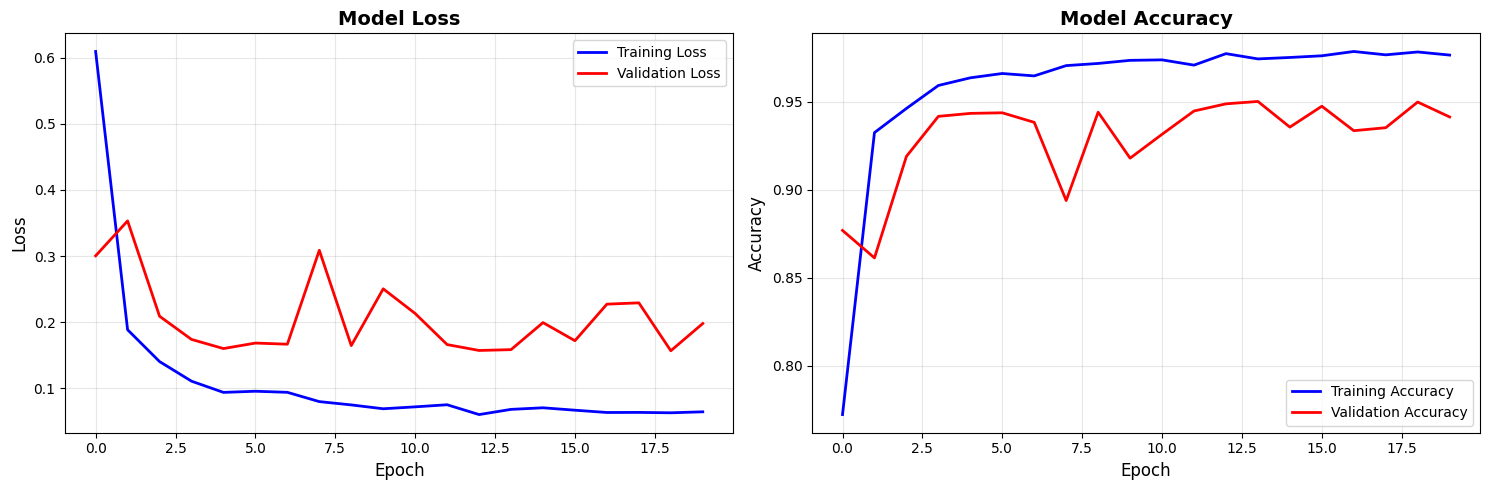

=== LSTM 모델 최종 성능 ===
Training Loss: 0.0645
Training Accuracy: 0.9765
Validation Loss: 0.1979
Validation Accuracy: 0.9413


In [29]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (한국어 라벨용)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(15, 5))

# 1. 손실(Loss) 그래프
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.plot(history_lstm.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# 2. 정확도(Accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
plt.plot(history_lstm.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 최종 성능 출력
print("=== LSTM 모델 최종 성능 ===")
print(f"Training Loss: {history_lstm.history['loss'][-1]:.4f}")
print(f"Training Accuracy: {history_lstm.history['accuracy'][-1]:.4f}")
print(f"Validation Loss: {history_lstm.history['val_loss'][-1]:.4f}")
print(f"Validation Accuracy: {history_lstm.history['val_accuracy'][-1]:.4f}")